Owner: Hritam Chakraborty (ObsGE)
Email: Hritam.Chakraborty_at_unige.ch

# Introduction

This exercise aims to built a simple LS periodogram from first principles.

**Have you used these python packages?** 

In [1]:
import numpy as np                              # Universally useful
import matplotlib.pyplot as plt                 # Plots
from scipy.optimize import curve_fit            # Uses a non-linear least square to fit a function to data [Levenberg-Marquaerdt algorithm and others]

import matplotlib.gridspec as gridspec          # Makes beautiful subplots.

from astropy.timeseries import LombScargle      # Astropy's very own Lomb-Scargle implementation

In [2]:
# Just a template to make plots aesthetically pleasing.
import matplotlib
params = {"figure.figsize": (25,10), 
"font.size": 14, 
#"font.family": 'serif', 
"font.weight": "normal", 
"xtick.major.size": 6, 
"xtick.minor.size": 2,
 "ytick.major.size": 6, 
 "ytick.minor.size": 2, 
 "xtick.major.width": 1, 
 "xtick.minor.width": 1, 
 "ytick.major.width": 1, 
 "ytick.minor.width": 1, 
 "xtick.major.pad": 8, 
 "xtick.minor.pad": 8, 
 "ytick.major.pad": 8, 
 "ytick.minor.pad": 8, 
 "lines.linewidth": 1.2, 
 "lines.markersize": 10, 
 "axes.linewidth": 1.8, 
 "legend.loc": "best", 
 "text.usetex":False, 
 "xtick.labelsize" : 14, 
 "ytick.labelsize" : 14, 
 "xtick.direction": "in", 
 "ytick.direction": "in", 
 "xtick.bottom":True, 
 "xtick.top":True, 
 "ytick.left":True, 
 "ytick.right":True, } 

matplotlib.rcParams.update(params)

from IPython.display import IFrame


# RV time-series

We will be using RV measurments of the infamous 51 Peg b.  The data is downloaded from DACE. 

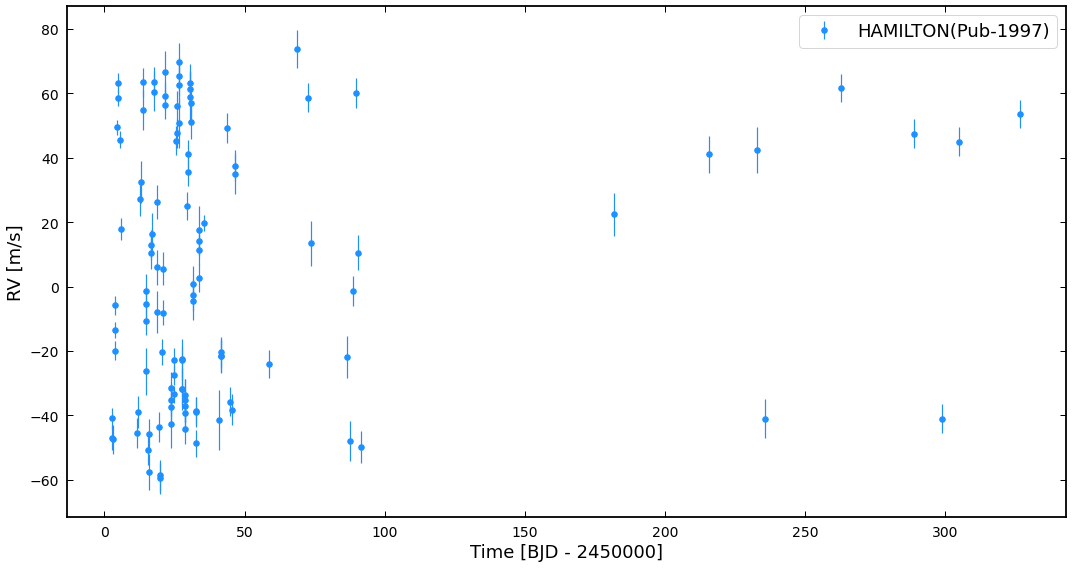

In [13]:
# Loading RV time-series from a .txt file
rv_series= np.loadtxt('51 Peg_HAMILTON_Pub-1997.txt').T

# loading each column of data.
time= rv_series[0] - 50000 # Time
rv= rv_series[1]           # Radial velocity
rv_err= rv_series[2]       # Error in radial velocity


# Plotting the RV time-series
fig = plt.figure(figsize = (15, 8))
gs = gridspec.GridSpec(1,1)

ax0= plt.subplot(gs[0,0])

ax0.errorbar(time, rv, yerr= rv_err, ms = 5.5, fmt= 'o', color = 'Dodgerblue', label= 'HAMILTON(Pub-1997)')
ax0.set_xlabel('Time [BJD - 2450000]', fontsize= 18)
ax0.set_ylabel('RV [m/s]', fontsize= 18)

#ax0.set_xlim(0, 35)
ax0.legend(fontsize= 18)
plt.tight_layout()
plt.show()

## Questions?

1. What's the orbital period of 51 Pegasi b? Check on NASA exoplanet database and note down the value for comparision.

2. Can you _visually_ detect any periodicity in the data? 

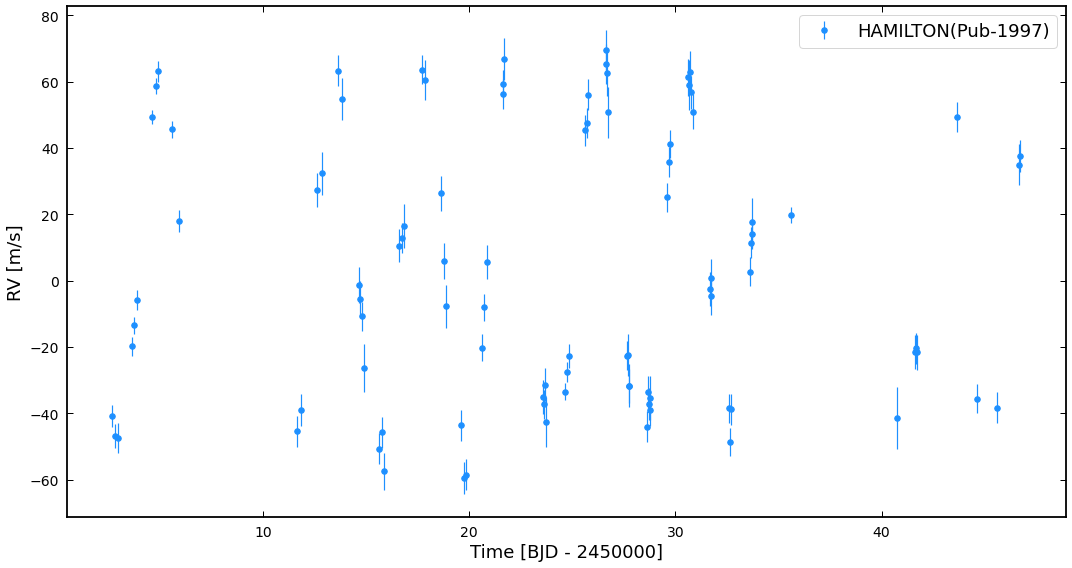

In [4]:
ind = np.where(time <= 50)
time_trimmed= time[ind]
rv_trimmed= rv[ind]
rv_trimmed_err= rv_err[ind]


fig = plt.figure(figsize = (15, 8))
gs = gridspec.GridSpec(1,1)

ax0= plt.subplot(gs[0,0])

ax0.errorbar(time_trimmed, rv_trimmed, yerr= rv_trimmed_err, ms = 5.5, fmt= 'o', color = 'Dodgerblue', label= 'HAMILTON(Pub-1997)')

ax0.set_xlabel('Time [BJD - 2450000]', fontsize= 18)
ax0.set_ylabel('RV [m/s]', fontsize= 18)

#ax0.set_xlim(0, 35)
ax0.legend(fontsize= 18)
plt.tight_layout()
plt.show()


---

## Step: 1 Define the period grid for planet search

Here, you have to define the minimum and the maximum period in which you want to search for periodicites in the RV time-series. 

Tip: Don't forget about the Nyquist-Shannon sampling theorm. 


In [14]:
period_min = ?  # day
period_max = ? # day
N= ? # number. This defines the number sampling of the period grid. 

period_grid= np.linspace(period_min, period_max, N) 
frequency_grid= 1/ period_grid 
#print(period_grid)


SyntaxError: invalid syntax (1280205095.py, line 1)

---

## Step: 2 Define a sinusoidal function

![](sinusoidal.png)


Goal: We intend to fit a sinusoidal function to the RV measurements for each periodicity defined in the period grid. 

In [15]:
#In the python function below, formulate a sinusoidal function with an offset.

def sinusoid():
    '''
    Write a sinusoidal function to fit your observations 
    '''

    return

In [16]:
# Just in case if you want to test your written function

# time_model= np.linspace(0, 50, 1000)
# model_rv= sinusoid(time_model, 1/4.5, 60, 0.0, 0.0)
# plt.plot(time_model, model_rv, lw=2, color = 'k')

# plt.xlabel('Time')
# plt.ylabel('RV [model]')

---

## Step: 3 Calculating the periodogram.

To compare the best fit between different frequencies, we need to define a goodness of the fit measure. Example: Root-mean square error,  Chi-square, Coefficient of determination, etc. 

_TASK_: Write a function to estimate the goodness of the fit between observations and best-fit model at any particular frequency.  


In [17]:
##      COMPLETE ONLY ONE FUNCTION ##

def RMSE(y_data, y_model):
    '''
    Calculate the RMSE between observations and best-fit model.
    '''

    return

def chi2(y_data, y_model):
    '''
    Calculate the CHI2 between observations and best-fit model.
    '''

    return 

def cod():
    '''
    Calculate the Coefficient of determination between observations and best-fit model.
    '''

    return

_The least squares method_


Numerous packages are available to perfrom least-squares fit. example, lm-fit, numpy, scipy, etc.


<iframe src="https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html" width="1200" height="500"></iframe>

In [9]:
???
for i, freq in enumerate(frequency_grid):
    

    popt, pcov= curve_fit( lambda time, A, phi, offset: sinusoid(time, freq, A, phi, offset), 

                            time_trimmed, rv_trimmed, 

                            method='lm',

                            p0=[60, 0.0, 0.0],
                             
                            maxfev=5000)

    best_fit_model= sinusoid(time_trimmed, freq, *popt )


    # Calculate goodness of fit for each frequency
    ????


### For you: Plot the Period vs. RMSE/ CHI2/ Coefficient of determination

---

## Astropy package for computing Lomb-Scargle Periodograms

<iframe src="https://docs.astropy.org/en/stable/timeseries/lombscargle.html" width="1200" height="500"></iframe>

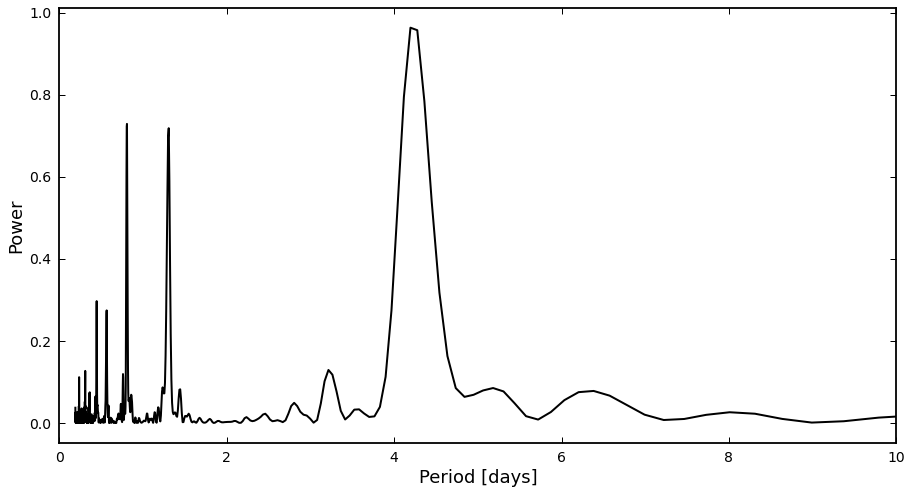

In [11]:
frequency, power = LombScargle(time_trimmed, rv_trimmed).autopower()

period= 1/frequency


fig = plt.figure(figsize = (15,8))
gs = gridspec.GridSpec(1,1)

ax0= plt.subplot(gs[0,0])
ax0.plot(period, power, lw = 2, color = 'k')
ax0.set_xlim(0, 10)

ax0.set_xlabel('Period [days]', fontsize= 18)
ax0.set_ylabel('Power', fontsize= 18)
plt.show()